# Project 2

## Part 1: PCA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

In [2]:
data = pd.read_csv('UTK-peers.csv', index_col=0, nrows=57)
data.head()

,Name,IPEDS#,Carm R1,HBC,% Blk Total Students,% Hisp Total Students,2017 US News top 65,2014 Med School,Vet School,Total Enroll,...,ACT/ SAT 25%,ACT/ SAT 75%,(State/ Tuit)/ St. FTE,Med School Res $,Academic Support Expenditures,Student Services Expenditures,Endowment Figure,Endowment per Student FTE,Total Faculty.1,Total Tenure /Tenure-Track Facutly.1
0,Univ. of Tennessee - Knoxville,221759.0,1,No,7,3,46,NaN,x,"27,845",...,24,30,"$22,094",$-,"$782,734,414","$30,587","$782,734,414","$30,587","1,526","1,117"
1,Univ. of Georgia,139959.0,1,No,8,5,18,NaN,x,"36,130",...,25,30,"$23,744",$-,"$939,024,216","$27,831","$939,024,216","$27,831","1,918","1,606"
2,Purdue Univ.,243780.0,1,No,3,4,20,NaN,x,"40,472",...,23,30,"$25,231",$-,"$2,445,541,926","$66,376","$2,445,541,926","$66,376","1,783","1,700"
3,Texas A&M Univ.,228723.0,1,No,3,19,27,pre clin,x,"63,813",...,23,29,"$29,423","$52,058","$10,521,034,492","$180,613","$10,521,034,492","$180,613","2,983","1,995"
4,Michigan State Univ.,171100.0,1,No,7,4,33,x,x,"50,538",...,23,28,"$22,975","$52,594","$2,549,137,018","$55,180","$2,549,137,018","$55,180","2,616","1,811"


## Clean data 

In [3]:
# drop non-numeric data 
data.drop(['HBC', '2014 Med School','Vet School'], axis=1, inplace =True)
# replace the $ and , to ''; replace '' to np.nan 
data[data.columns[2:]] = data[data.columns[2:]].replace('[\$,]', '', regex=True)
data[data.columns[2:]] = data[data.columns[2:]].replace('-', np.nan, regex=True)


# change str to numeric; considering that the int and float does not make a difference when we dealing the data,
# thus we change the str data to float rather than int

# the ID of university is numeric, should be object
data['IPEDS#'] = data['IPEDS#'].astype(str)

# select numeric data 
data.iloc[:, 2:] = data.iloc[:, 2:].astype(float)

data.dtypes

Name                                           object
IPEDS#                                         object
Carm R1                                       float64
% Blk Total Students                          float64
% Hisp Total Students                         float64
2017 US News top 65                           float64
 Total Enroll                                 float64
% Grad Enroll                                 float64
Six-year graduation rate                      float64
 ACT/ SAT Avg                                 float64
Fresh Admit Rate                              float64
% Freshmen Retention                          float64
% UG Pell Grants                              float64
% Bachelors                                   float64
% Doct/ Profess                               float64
Total E&G Expend                              float64
E&G / St. FTE                                 float64
State Approp Rev                              float64
Tuition/Fee Rev             

### Impute missing values

In [4]:
df = data.isnull().sum()
df[df>0]

Endowment                         1
Wall St. Jourl Rank              12
Enowment / St. FTE                1
AG Research ($000)               20
Faculty Academy Memb              2
Profess Degrees                   4
ACT/ SAT 25%                      1
ACT/ SAT 75%                      1
Med School Res $                 24
Academic Support Expenditures     4
dtype: int64

In [5]:
### 10 missing values
'''
1. the 'Wall St. Jourl Rank' is nominal data, cannot be imputed; the 'AG Research ($000)' and 'Med School Res $' has  
many missing values, we drop these three columns;
2. we impute the mssing values with mean values
'''
data.drop(['Wall St. Jourl Rank', 'AG Research ($000)', 'Med School Res $'], axis=1, inplace= True)
data.fillna(data.mean(), inplace = True)
data.head()

,Name,IPEDS#,Carm R1,% Blk Total Students,% Hisp Total Students,2017 US News top 65,Total Enroll,% Grad Enroll,Six-year graduation rate,ACT/ SAT Avg,...,Profess Degrees,ACT/ SAT 25%,ACT/ SAT 75%,(State/ Tuit)/ St. FTE,Academic Support Expenditures,Student Services Expenditures,Endowment Figure,Endowment per Student FTE,Total Faculty.1,Total Tenure /Tenure-Track Facutly.1
0,Univ. of Tennessee - Knoxville,221759.0,1.0,7.0,3.0,46.0,27845.0,21.0,70.0,27.0,...,219.0,24.0,30.0,22094.0,7.827344e+08,30587.0,7.827344e+08,30587.0,1526.0,1117.0
1,Univ. of Georgia,139959.0,1.0,8.0,5.0,18.0,36130.0,24.0,85.0,27.5,...,425.0,25.0,30.0,23744.0,9.390242e+08,27831.0,9.390242e+08,27831.0,1918.0,1606.0
2,Purdue Univ.,243780.0,1.0,3.0,4.0,20.0,40472.0,24.0,75.0,26.5,...,256.0,23.0,30.0,25231.0,2.445542e+09,66376.0,2.445542e+09,66376.0,1783.0,1700.0
3,Texas A&M Univ.,228723.0,1.0,3.0,19.0,27.0,63813.0,23.0,79.0,26.0,...,730.0,23.0,29.0,29423.0,1.052103e+10,180613.0,1.052103e+10,180613.0,2983.0,1995.0
4,Michigan State Univ.,171100.0,1.0,7.0,4.0,33.0,50538.0,23.0,77.0,25.5,...,627.0,23.0,28.0,22975.0,2.549137e+09,55180.0,2.549137e+09,55180.0,2616.0,1811.0


In [6]:
data.shape

(57, 59)

In [7]:
data_numeric = data.iloc[:, 2:]

In [8]:
## standardlize the data 
def std(data):
    return (data-data.mean())/data.std()

data_numeric = std(data_numeric)
data_numeric.head()

,Carm R1,% Blk Total Students,% Hisp Total Students,2017 US News top 65,Total Enroll,% Grad Enroll,Six-year graduation rate,ACT/ SAT Avg,Fresh Admit Rate,% Freshmen Retention,...,Profess Degrees,ACT/ SAT 25%,ACT/ SAT 75%,(State/ Tuit)/ St. FTE,Academic Support Expenditures,Student Services Expenditures,Endowment Figure,Endowment per Student FTE,Total Faculty.1,Total Tenure /Tenure-Track Facutly.1
0,-0.233626,0.509334,-0.875558,0.612011,-0.728009,-0.422929,-0.713031,-0.009136,0.902676,-1.166283,...,-0.662197,-0.13484,0.080845,-0.356619,-0.387184,-0.210980,-0.378717,-0.278384,-0.496473,-0.491087
1,-0.233626,0.811751,-0.574915,-0.707948,0.081746,0.040666,0.917026,0.251252,-0.317332,0.985113,...,0.167582,0.33710,0.080845,-0.056790,-0.307388,-0.266202,-0.300160,-0.333041,-0.079389,0.561113
2,-0.233626,-0.700334,-0.725237,-0.613665,0.506122,0.040666,-0.169678,-0.269525,0.000931,0.339694,...,-0.513159,-0.60678,0.080845,0.213418,0.461788,0.506123,0.457079,0.431395,-0.223028,0.763376
3,-0.233626,-0.700334,1.529590,-0.283675,2.787413,-0.113865,0.265003,-0.529914,0.425281,-0.090585,...,1.396138,-0.60678,-0.485071,0.975163,4.584855,2.795086,4.516155,2.696977,1.053762,1.398139
4,-0.233626,0.509334,-0.725237,-0.000827,1.489948,-0.113865,0.047662,-0.790303,0.372237,0.339694,...,0.981249,-0.60678,-1.050988,-0.196528,0.514680,0.281789,0.509150,0.209352,0.663277,1.002219


In [9]:
## run SVD decomposition
mat = np.array(data_numeric)
u, s, vh = np.linalg.svd(mat, full_matrices=True)
print(u.shape, s.shape, vh.shape)

(57, 57) (57,) (57, 57)


In [10]:
## eigenvalues of pca
s**2/57 

array([2.35303086e+01, 6.10146769e+00, 5.22715083e+00, 3.82022200e+00,
       3.03873594e+00, 2.34556863e+00, 1.87155691e+00, 1.57618792e+00,
       1.32406885e+00, 1.04315354e+00, 9.01545275e-01, 7.14161800e-01,
       6.25224809e-01, 5.11781865e-01, 4.65788360e-01, 4.26827402e-01,
       3.55763884e-01, 3.25634367e-01, 2.40767471e-01, 2.31628559e-01,
       1.84774478e-01, 1.65699071e-01, 1.50949058e-01, 1.20247696e-01,
       1.12652139e-01, 9.93548103e-02, 6.97998111e-02, 6.17341500e-02,
       5.64518606e-02, 5.20309264e-02, 4.72952423e-02, 3.19551081e-02,
       2.87474882e-02, 2.30878985e-02, 2.23478229e-02, 2.00238202e-02,
       1.66675610e-02, 1.41007997e-02, 9.36367340e-03, 9.06927572e-03,
       7.51807772e-03, 5.40940578e-03, 4.30191675e-03, 3.28467784e-03,
       2.22511631e-03, 1.33640789e-03, 5.86574739e-04, 4.54318195e-04,
       4.10582498e-04, 3.17109210e-04, 1.52381873e-04, 6.27553317e-05,
       2.98011502e-05, 1.34758894e-05, 8.58204094e-13, 1.69530249e-31,
      

In [24]:
# percentage of variance explained
# we think 11 principal component should be chosen since the variance explained by them is over 90%
np.cumsum(s**2) / np.sum(s**2) 

array([0.42018408, 0.52913886, 0.62248084, 0.69069909, 0.74496223,
       0.78684739, 0.82026805, 0.84841426, 0.87205835, 0.89068609,
       0.90678511, 0.919538  , 0.93070273, 0.93984169, 0.94815934,
       0.95578126, 0.96213418, 0.96794908, 0.9722485 , 0.97638473,
       0.97968427, 0.98264318, 0.9853387 , 0.98748598, 0.98949763,
       0.99127182, 0.99251825, 0.99362064, 0.99462871, 0.99555783,
       0.99640239, 0.99697302, 0.99748637, 0.99789865, 0.99829772,
       0.99865529, 0.99895292, 0.99920472, 0.99937193, 0.99953388,
       0.99966813, 0.99976473, 0.99984155, 0.9999002 , 0.99993994,
       0.9999638 , 0.99997428, 0.99998239, 0.99998972, 0.99999539,
       0.99999811, 0.99999923, 0.99999976, 1.        , 1.        ,
       1.        , 1.        ])

In [27]:
s**2

array([1.34122759e+03, 3.47783658e+02, 2.97947597e+02, 2.17752654e+02,
       1.73207948e+02, 1.33697412e+02, 1.06678744e+02, 8.98427115e+01,
       7.54719243e+01, 5.94597517e+01, 5.13880807e+01, 4.07072226e+01,
       3.56378141e+01, 2.91715663e+01, 2.65499365e+01, 2.43291619e+01,
       2.02785414e+01, 1.85611589e+01, 1.37237459e+01, 1.32028279e+01,
       1.05321453e+01, 9.44484703e+00, 8.60409630e+00, 6.85411868e+00,
       6.42117195e+00, 5.66322419e+00, 3.97858923e+00, 3.51884655e+00,
       3.21775606e+00, 2.96576280e+00, 2.69582881e+00, 1.82144116e+00,
       1.63860683e+00, 1.31601021e+00, 1.27382590e+00, 1.14135775e+00,
       9.50050978e-01, 8.03745582e-01, 5.33729384e-01, 5.16948716e-01,
       4.28530430e-01, 3.08336129e-01, 2.45209255e-01, 1.87226637e-01,
       1.26831630e-01, 7.61752499e-02, 3.34347601e-02, 2.58961371e-02,
       2.34032024e-02, 1.80752250e-02, 8.68576676e-03, 3.57705391e-03,
       1.69866556e-03, 7.68125695e-04, 4.89176334e-11, 9.66322422e-30,
      

## Scree plot 
Based on the scree plot, the prime number of components is 3, and a total of 98% variance can be explained

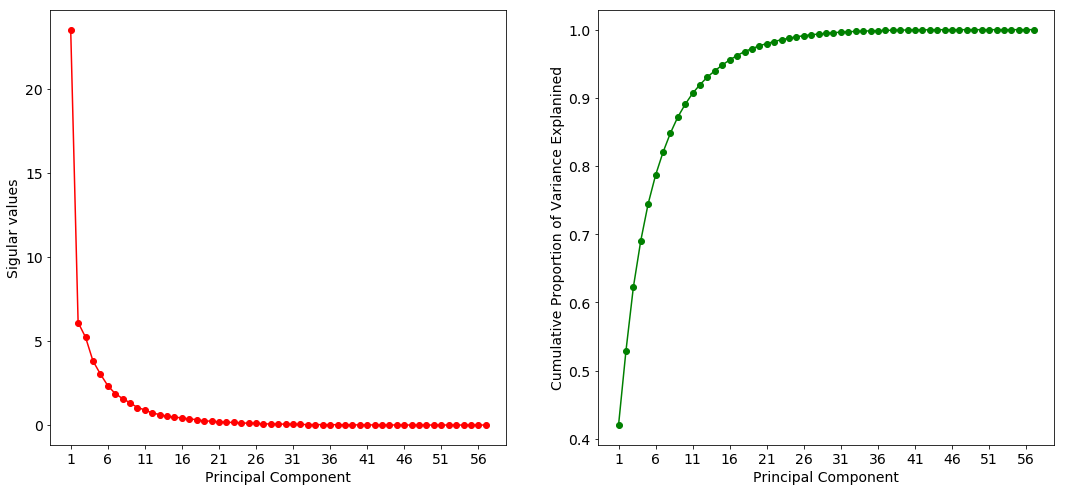

In [29]:
## create scree plot
def scree_plot(s):
    
    plt.figure(figsize=(18,8))
    plt.rc('font', size=14)
    # frist plot    
    plt.subplot(1, 2, 1) 
    ran = np.arange(1, len(s)+1, 5)
    plt.plot(np.arange(1,len(s)+1), s**2/57, 'ro-')
    plt.xticks(ran)
    plt.xlabel('Principal Component')
    plt.ylabel('Sigular values')


    # second plot
    plt.subplot(1, 2, 2)
    s_cum = np.cumsum(s**2/57)/np.sum(s**2/57)
    plt.plot(np.arange(1,len(s_cum)+1), s_cum, 'go-')
    plt.xticks(ran)
    plt.xlabel('Principal Component')
    plt.ylabel('Cumulative Proportion of Variance Explanined')    
    
    plt.show()

scree_plot(s)

### Write a function to reduce your data matrix to the first k PCs, where k is the best value you have determined in step (3). (Hint: To do this, use the first k columns of your V matrix. Note that the SVD package returns U, Σ, and VT, since it factors X = UΣVT.)

In [30]:
k = 11
mat_reduce =  mat @ vh.T[:, :11]  # the reduced matrix

In [31]:
mat_reduce

array([[ 3.55371637e+00,  5.71952945e-01,  8.22204188e-01,
        -1.49752451e-01,  1.87002944e-01,  4.86189459e-01,
        -4.72030653e-01, -1.62705102e-01,  9.67518261e-02,
        -3.50390932e-01, -5.87713501e-01],
       [ 3.47190489e-01, -9.56918015e-02, -1.30686808e+00,
        -1.87335512e+00, -1.12625427e+00,  1.79070396e-01,
        -1.34361802e+00, -5.26170350e-01, -4.58249598e-01,
         8.80375971e-01, -1.09561386e-01],
       [-1.27593437e+00, -7.44782661e-01, -4.79037896e-01,
        -1.65939465e+00,  2.65790416e-01, -1.15101352e+00,
        -1.97731264e-01,  1.81704964e+00,  7.12141094e-02,
         2.42870091e-02, -8.19879351e-01],
       [-8.68990732e+00, -5.20422553e+00, -6.39148416e-01,
        -4.73958168e+00,  3.39891043e+00,  5.13079319e+00,
         2.10259489e+00,  1.43459943e+00,  1.02786417e+00,
         1.19200699e+00, -5.67653781e-01],
       [-2.58635003e+00, -3.15827757e+00, -4.78028829e-01,
        -8.75559549e-01,  1.35579587e+00, -1.02273907e+00,
  

### 5. Make a scatter plot of the first two PCs. You can improve your plot by annotating the points with the universities’ numbers or names.

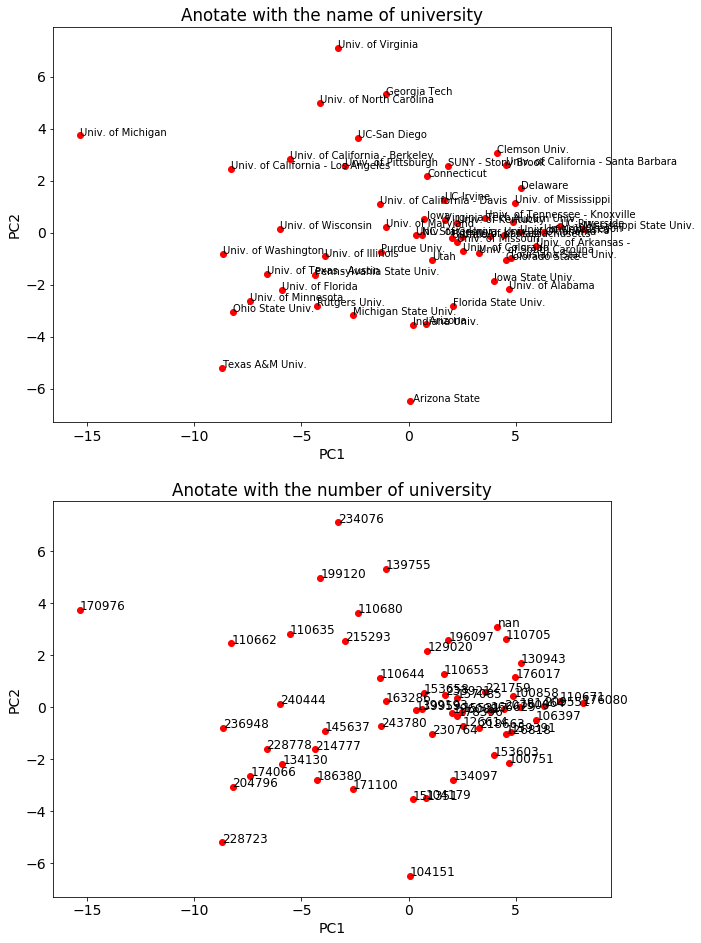

In [14]:
## scatter plot
PC1, PC2 = mat_reduce[:,0], mat_reduce[:,1]

def plot_pc(PC1, PC2, data): 
    
    ## create two plots
    f, (ax1, ax2) = plt.subplots(2, 1, sharey=True, figsize=(10,16))
    
    # subplot 1 
    for i, t in enumerate(list(data['Name'])):
        x, y = PC1[i], PC2[i]
        ax1.scatter(x, y,color='red')
        ax1.text(x, y, t, fontsize=10)
        ax1.set_xlabel('PC1')
        ax1.set_ylabel('PC2')
        ax1.set_title('Anotate with the name of university')
        
    # subplot 2
    for i, t in enumerate(list(data['IPEDS#'])):
        x, y = PC1[i], PC2[i]
        ax2.scatter(x, y,color='red')
        ax2.text(x, y, t.split('.')[0], fontsize=12)
        ax2.set_xlabel('PC1')
        ax2.set_ylabel('PC2')
        ax2.set_title('Anotate with the number of university')
    
    plt.show()
    
    
plot_pc(PC1, PC2, data)

## Part 2: K-Means and EM algorithm

In [32]:
## K-means implementation
def distance(p1, p2):  #eucludeian distance
    return np.sum(np.square((p1-p2)))**0.5

def assign_centroid(centroids, points):
    assign_points = []
    for p in points:
        dist = [distance(p, c) for c in centroids]
        min_idx = dist.index(min(dist))
        assign_points.append((min_idx, p))
    return assign_points

def get_centroids(assign_points):
    cent = {}
    c = []
    for i, j in assign_points:
        if i in cent.keys():
            cent[i][0] += 1
            cent[i][1] += j
        else:
            cent[i] = [1, j]
    c = [cent[k][1] / cent[k][0] for k in sorted(cent)]
    return np.array(c)

def centroid_change(old_centroids, new_centroids):
    return sum([distance(old, new) for old, new in zip(old_centroids, new_centroids)])


def kmeans(k, data):
    # get initial k points
    np.random.seed(815)
    idx = np.random.choice(data.shape[0],k)
    centroids = np.copy(data)[idx, :]
    assign_points = assign_centroid(centroids, np.copy(data))
    
    ### converge standard
    sigma = 1/10**3
    change_in_centroid = float('inf')
    
    ### iteration 
    iteration = 0
    while change_in_centroid > sigma:
        iteration += 1
        old_centroids = centroids
        centroids = get_centroids(assign_points)
        assign_points = assign_centroid(centroids, np.copy(data))
        change_in_centroid = centroid_change(old_centroids, centroids)
    
    print('Complete clustering with %d interation' % iteration)
    
    return iteration, centroids, assign_points


In [33]:
### function to get the prime number of cluster 
from collections import defaultdict
from itertools import combinations

def min_inter_dist(assign_points):
    min_list = []
    d = defaultdict(list)
    for i, p in assign_points:
        d[i].append(p)
    for k,j in combinations(list(d.keys()),2):
        dist_list = []
        c1, c2 = d[k], d[j]
        for p1 in c1:
            for p2 in c2:
                dist_list.append(distance(p1,p2))
        min_list.append(min(dist_list))
    return min(min_list)
    
    
def max_intra_dist(assign_points):
    d = defaultdict(list)
    max_list = []
    for i, p in assign_points:
        d[i].append(p)
    for k, v in d.items():
        dist_list = []
        if len(v)>=2:
            for p1, p2 in combinations(v,2):
                dist_list.append(distance(p1,p2))
        max_list.append(max(dist_list))
    return max(max_list)


## For full dataset

### Since the higher the dunn index, the better the performance, thus we think the prime cluster number is 4


Complete clustering with 7 interation
Complete clustering with 5 interation
Complete clustering with 5 interation
Complete clustering with 7 interation
Complete clustering with 10 interation
Complete clustering with 8 interation
Complete clustering with 8 interation
        k=2       k=3       k=4       k=5       k=6       k=7       k=8
0  7.000000  5.000000  5.000000  7.000000  10.00000  8.000000  8.000000
1  0.240972  0.233833  0.261686  0.213809   0.21881  0.246609  0.246609


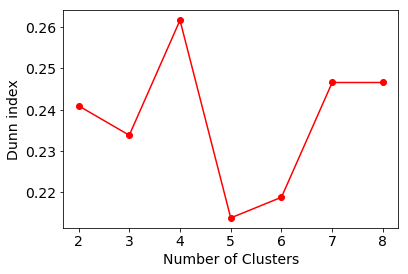

In [43]:
## plot the dunn index for different cluster number
def plot_dunn(data,k=9):
    dunn_list = []
    iteration_list  = []
    for j in range(2,k):
        iteration, centroids, assign_points = kmeans(j, data)
        dunn_list.append(min_inter_dist(assign_points) / max_intra_dist(assign_points))
        iteration_list.append(iteration)
    
    df = pd.DataFrame(np.array(list(zip(iteration_list, dunn_list))).T, columns = ['k='+str(i) for i in range(2,k)])
    print(df)

    ## plot 
    plt.plot(range(2,k), dunn_list, 'ro-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Dunn index')
    plt.show()

plot_dunn(mat)

### Visualize the cluster result

In [57]:
def plot_cluster(nd, k):
    iteration, centroids, assign_points = kmeans(k,nd)
    
    ## scatter plot 
    cluster_id = [p[0] for p in assign_points]

    PC1, PC2 = mat_reduce[:,0], mat_reduce[:,1]

    fig, ax = plt.subplots(figsize=(12,10))
    ax.scatter(PC1, PC2, c = cluster_id)
    for i, t in enumerate(list(data['Name'])):
        ax.annotate(t, (PC1[i], PC2[i]), fontsize=10)
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_title('Anotate with the name of university')
    plt.show()
    return cluster_id

Complete clustering with 5 interation


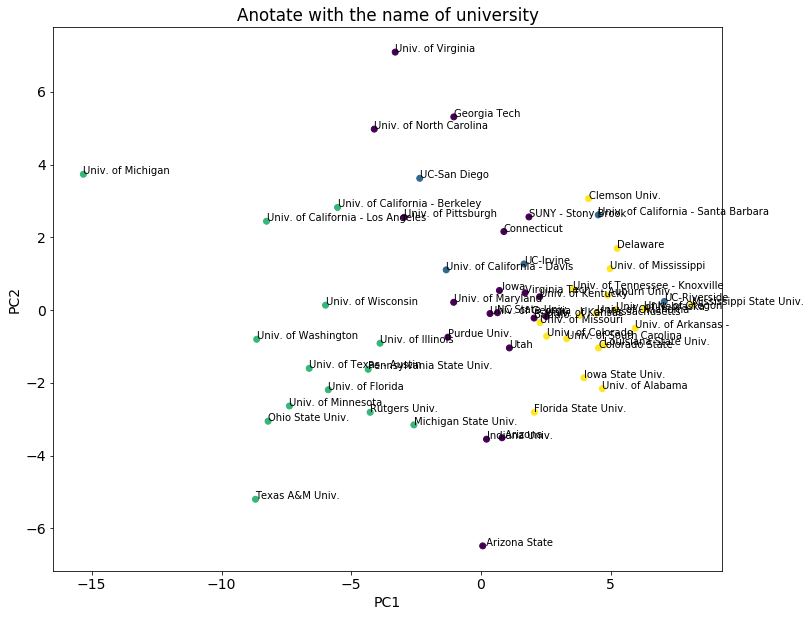

In [58]:
cluster_id = plot_cluster(mat, 4)

### From the results, we can find the following universities are in the same cluster as UTK.

In [19]:
cluster_df = pd.DataFrame(list(zip(cluster_id, list(data['Name']))), columns = ['cluster_id', 'university_name'])
cluster2 = cluster_df[cluster_df['cluster_id']==3] # the cluster number of UTK is 2
cluster2

,cluster_id,university_name
0,3,Univ. of Tennessee - Knoxville
6,3,Clemson Univ.
9,3,Auburn Univ.
10,3,Iowa State Univ.
28,3,Louisiana State Univ.
31,3,Mississippi State Univ.
32,3,Univ. of Missouri
33,3,Univ. of Alabama
34,3,Univ. of Arkansas -
35,3,Univ. of Mississippi


## Run data with reduced matrix

Complete clustering with 7 interation
Complete clustering with 4 interation
Complete clustering with 6 interation
Complete clustering with 4 interation
Complete clustering with 6 interation
Complete clustering with 6 interation
Complete clustering with 6 interation
        k=2       k=3       k=4       k=5      k=6      k=7      k=8
0  7.000000  4.000000  6.000000  4.000000  6.00000  6.00000  6.00000
1  0.207997  0.206137  0.218445  0.201208  0.17878  0.17878  0.17878


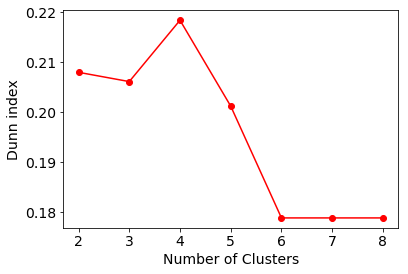

In [45]:
## Run data with reduced matrix
plot_dunn(mat_reduce)

Complete clustering with 6 interation


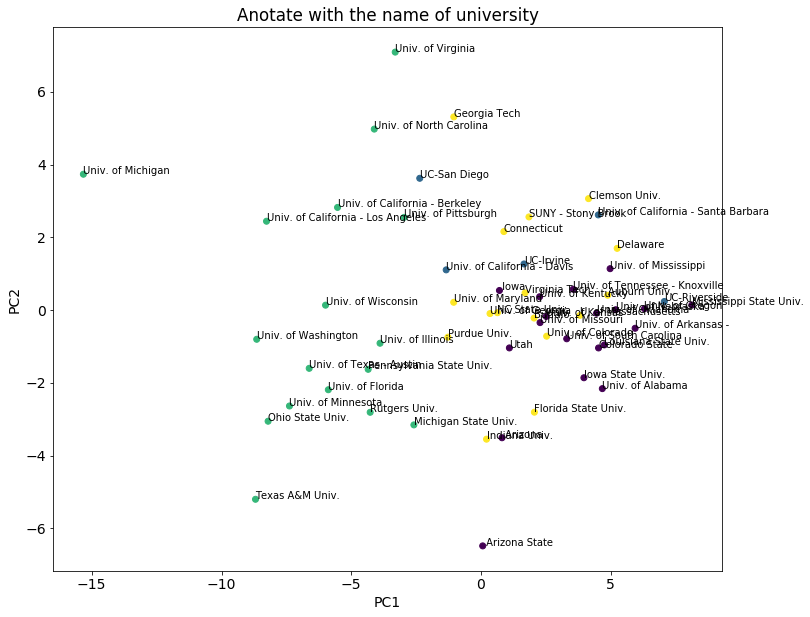

,cluster_id,university_name
0,0,Univ. of Tennessee - Knoxville
10,0,Iowa State Univ.
28,0,Louisiana State Univ.
30,0,Univ. of Kentucky
31,0,Mississippi State Univ.
32,0,Univ. of Missouri
33,0,Univ. of Alabama
34,0,Univ. of Arkansas -
35,0,Univ. of Mississippi
36,0,Univ. of South Carolina


In [63]:
cluster_id = plot_cluster(mat_reduce,4)
cluster_df = pd.DataFrame(list(zip(cluster_id, list(data['Name']))), columns = ['cluster_id', 'university_name'])
cluster2 = cluster_df[cluster_df['cluster_id']==0] # the cluster number of UTK is 0
cluster2

## Run data with first two PCs

Complete clustering with 5 interation
Complete clustering with 5 interation
Complete clustering with 6 interation
Complete clustering with 5 interation
Complete clustering with 5 interation
Complete clustering with 5 interation
Complete clustering with 5 interation
        k=2       k=3       k=4     k=5     k=6     k=7     k=8
0  5.000000  5.000000  6.000000  5.0000  5.0000  5.0000  5.0000
1  0.097169  0.055511  0.060471  0.0513  0.0661  0.0661  0.0661


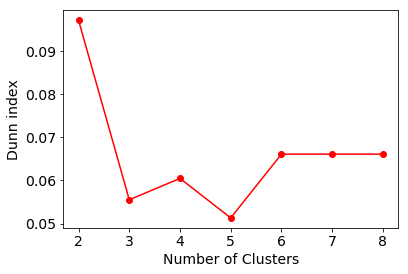

In [46]:
## Run data with first two PCs
plot_dunn(mat_reduce[:, :2])

Complete clustering with 5 interation


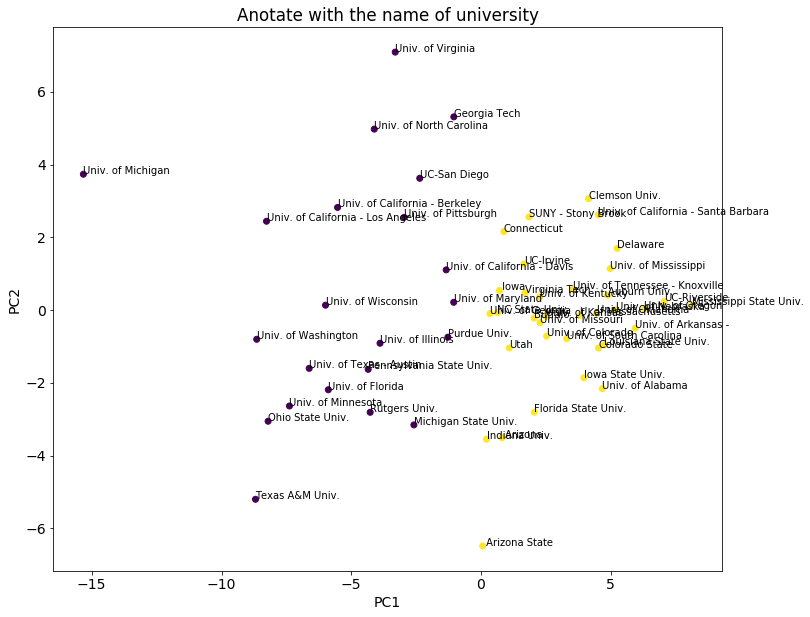

,cluster_id,university_name
0,1,Univ. of Tennessee - Knoxville
1,1,Univ. of Georgia
6,1,Clemson Univ.
7,1,Indiana Univ.
9,1,Auburn Univ.
10,1,Iowa State Univ.
11,1,NC State Univ.
20,1,Univ. of California - Santa Barbara
28,1,Louisiana State Univ.
29,1,Virginia Tech


In [65]:
cluster_id = plot_cluster(mat_reduce[:, :2],2)
cluster_df = pd.DataFrame(list(zip(cluster_id, list(data['Name']))), columns = ['cluster_id', 'university_name'])
cluster2 = cluster_df[cluster_df['cluster_id']==1] # the cluster number of UTK is 0
cluster2

## EM Algorithm 

In [108]:
def EM(X, k, eps, max_iters = 1000):

    # n = number of data-points, d = dimension of data points        
    n, d = X.shape

    # randomly choose the starting centroids/means 
    ## as 3 of the points from datasets 
    np.random.seed(1145)
    mu = X[np.random.choice(n, k, False), :]

    # initialize the covariance matrices for each gaussians
    Sigma= [np.eye(d)] * k

    # initialize the probabilities/weights for each gaussians
    w = [1./k] * k

    # responsibility matrix is initialized to all zeros
    # we have responsibility for each of n points for eack of k gaussians
    R = np.zeros((n, k))

    ### log_likelihoods
    log_likelihoods = []

    
    # Iterate till max_iters iterations        
    while len(log_likelihoods) < max_iters:

        # E - Step

        ## Vectorized implementation of e-step equation to calculate the 
        ## membership for each of k -gaussians
        for i in range(k):
            R[:, i] = w[i] * multivariate_normal.pdf(X, mu[i], Sigma[i], allow_singular=True)

        ### Likelihood computation
        log_likelihood = np.sum(np.log(np.sum(R, axis = 1)))

        log_likelihoods.append(log_likelihood)

        ## Normalize so that the responsibility matrix is row stochastic
        R = (R.T / np.sum(R, axis = 1)).T

        ## The number of datapoints belonging to each gaussian 
        h = np.sum(R, axis = 0)
        
        # get the label of each point       
        N = np.zeros_like(R)
        N[np.arange(len(R)), R.argmax(1)] = 1
        label = np.argmax(N, axis=1)
        
        # M Step
        ## calculate the new mean and covariance for each gaussian by 
        ## utilizing the new responsibilities
        for i in range(k):

            ## means
            mu[i] = 1. / h[i] * np.sum(R[:, i] * X.T, axis = 1).T
            x_mu = np.matrix(X - mu[i])

            ## covariances
            Sigma[i] = np.array(1 / h[i] * np.dot(np.multiply(x_mu.T,  R[:, i]), x_mu))

            ## and finally the probabilities
            w[i] = 1. / n * h[i]
        
        # check for onvergence
        if len(log_likelihoods) < 2 : continue
        if np.abs(log_likelihood - log_likelihoods[-2]) < eps: break
    return list(zip(label, X))

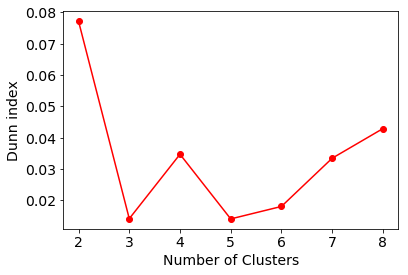

In [109]:
eps = 10**-4

dunn_list = []
iteration_list  = []
for j in range(2,9):
    assign_points = EM(mat_reduce[:,:2], j, eps)
    dunn_list.append(min_inter_dist(assign_points) / max_intra_dist(assign_points))
    iteration_list.append(iteration)
df = pd.DataFrame(np.array(list(zip(iteration_list, dunn_list))).T, columns = ['k='+str(i) for i in range(2,9)])

## plot 
plt.plot(range(2,9), dunn_list, 'ro-')
plt.xlabel('Number of Clusters')
plt.ylabel('Dunn index')
plt.show()

In [112]:
print(df)

        k=2      k=3       k=4       k=5       k=6       k=7       k=8
0  5.000000  5.00000  5.000000  5.000000  5.000000  5.000000  5.000000
1  0.077142  0.01417  0.034717  0.014095  0.018075  0.033455  0.042901


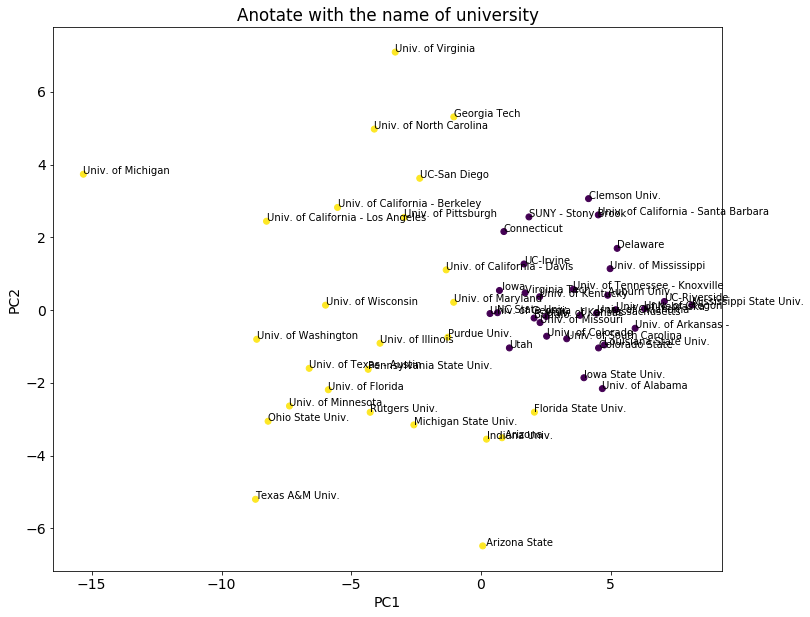

In [113]:
## scatter plot 
assign_points = EM(mat_reduce[:,:2], 2, eps)

cluster_id = [p[0] for p in assign_points]

PC1, PC2 = mat_reduce[:,0], mat_reduce[:,1]

fig, ax = plt.subplots(figsize=(12,10))
ax.scatter(PC1, PC2, c = cluster_id)
for i, t in enumerate(list(data['Name'])):
    ax.annotate(t, (PC1[i], PC2[i]), fontsize=10)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Anotate with the name of university')
plt.show()

In [115]:
cluster_df = pd.DataFrame(list(zip(cluster_id, list(data['Name']))), columns = ['cluster_id', 'university_name'])
cluster2 = cluster_df[cluster_df['cluster_id']==0] # the cluster number of UTK is 0
cluster2

,cluster_id,university_name
0,0,Univ. of Tennessee - Knoxville
1,0,Univ. of Georgia
6,0,Clemson Univ.
9,0,Auburn Univ.
10,0,Iowa State Univ.
11,0,NC State Univ.
20,0,Univ. of California - Santa Barbara
28,0,Louisiana State Univ.
29,0,Virginia Tech
30,0,Univ. of Kentucky


# For Big University data 

In [137]:
data = pd.read_csv('IPEDS-big-trimmed.csv')

In [138]:
u_df = data.isnull().sum()
u_df[u_df>0]

Average net price-students awarded grant or scholarship aid  2015-16 (SFA1516)          1594
Percent of full-time first-time undergraduates awarded any financial aid (SFA1516)       177
Average amount of federal  state  local or institutional grant aid awarded (SFA1516)     205
Total price for in-state students living on campus 2016-17 (DRVIC2016)                   527
Total price for out-of-state students living on campus 2016-17 (DRVIC2016)               527
Percent admitted - total (DRVADM2016)                                                    490
Percent admitted - men (DRVADM2016)                                                      533
Percent admitted - women (DRVADM2016)                                                    543
Full-time retention rate  2016 (EF2016D)                                                 211
Part-time retention rate  2016 (EF2016D)                                                 932
Undergraduate enrollment (DRVEF2016)                                  

### It seems that a lot of variabls have missing values; we first remove the variables with about 500 missing values, then compute the missing values with average value.

In [139]:
## It seems that a lot of variabls have missing values
u_df = data.isnull().sum()
data.drop(u_df[u_df>450].index,axis=1,inplace=True)

In [140]:
data.fillna(data.mean(), inplace = True)
data.head()

,UnitID,Institution Name,Percent of full-time first-time undergraduates awarded any financial aid (SFA1516),Average amount of federal state local or institutional grant aid awarded (SFA1516),Full-time retention rate 2016 (EF2016D),Undergraduate enrollment (DRVEF2016),Graduate enrollment (DRVEF2016),Nondegree/certificate-seeking undergraduate enrollment (DRVEF2016),Continuing degree/certificate-seeking undergraduate enrollment (DRVEF2016),Transfer-in degree/certificate-seeking undergraduate enrollment (DRVEF2016),...,Full-time enrollment (DRVEF2016),Part-time enrollment (DRVEF2016),Graduation rate total cohort (DRVGR2016),Graduation rate men (DRVGR2016),Graduation rate women (DRVGR2016),Graduation rate - Bachelor degree within 4 years total (DRVGR2016),Graduation rate - Bachelor degree within 5 years total (DRVGR2016),Graduation rate - Bachelor degree within 6 years total (DRVGR2016),Core revenues total dollars (DFR2005),Tuition and fees as a percent of core revenues (DFR2005)
0,222178,Abilene Christian University,100.0,17550.000000,76.000000,3758.0,1152.0,39.0,2557.0,115.0,...,3896.0,1014.0,62.000000,57.000000,67.00000,48.000000,61.000000,62.000000,8.349148e+07,53.000000
1,488031,Abraham Lincoln University,0.0,13635.392729,72.903955,25.0,139.0,0.0,19.0,6.0,...,152.0,12.0,50.436317,46.608008,53.91477,35.055326,46.594105,49.762668,1.328794e+08,51.106291
2,108232,Academy of Art University,53.0,8417.000000,71.000000,8303.0,4305.0,121.0,6380.0,738.0,...,7480.0,5128.0,37.000000,31.000000,42.00000,5.000000,26.000000,34.000000,9.760335e+07,99.000000
3,439969,Acupuncture and Massage College,83.0,3935.000000,83.000000,31.0,123.0,0.0,19.0,0.0,...,154.0,0.0,78.000000,100.000000,71.00000,35.055326,46.594105,49.762668,1.330132e+06,84.000000
4,126182,Adams State University,97.0,7562.000000,61.000000,2014.0,1356.0,32.0,1217.0,304.0,...,2026.0,1344.0,25.000000,17.000000,32.00000,14.000000,24.000000,29.000000,2.869403e+07,25.000000


In [141]:
## standardlize the data 
def std(data):
    return (data-data.mean())/data.std()

data.iloc[:, 2:] = std(data.iloc[:, 2:])
mat= np.array(data.iloc[:, 2:])

In [142]:
mat.shape

(2158, 27)

In [143]:
## run SVD decomposition
u, s, vh = np.linalg.svd(mat, full_matrices=True)
print(u.shape, s.shape, vh.shape)

np.cumsum(s**2) / np.sum(s**2) 

(2158, 2158) (27,) (27, 27)


array([0.33162243, 0.56495569, 0.6392269 , 0.69938346, 0.74248629,
       0.78381215, 0.82141917, 0.85422747, 0.88375903, 0.91111674,
       0.93244531, 0.94967939, 0.96273562, 0.9730546 , 0.98120281,
       0.98759934, 0.99275035, 0.99594152, 0.99830132, 0.9993461 ,
       0.99999498, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

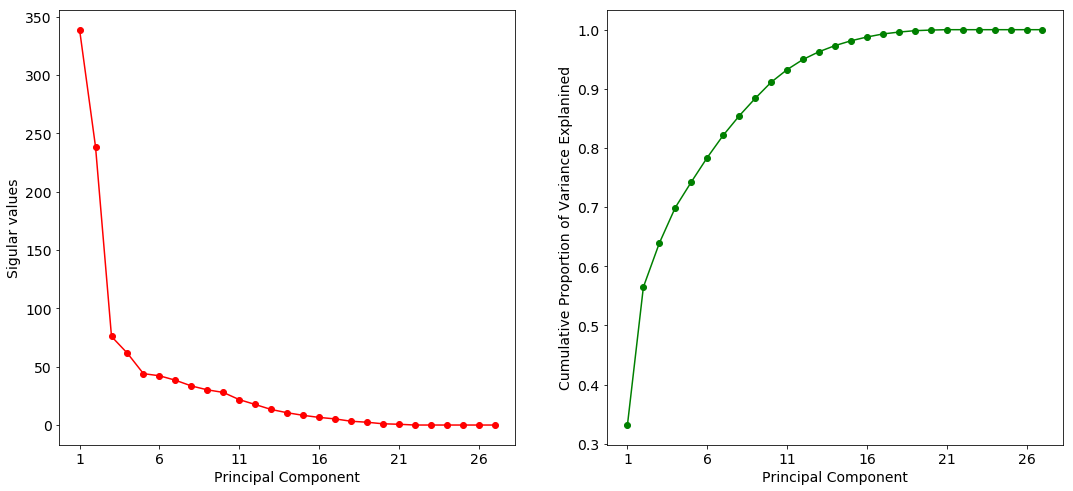

In [144]:
scree_plot(s)

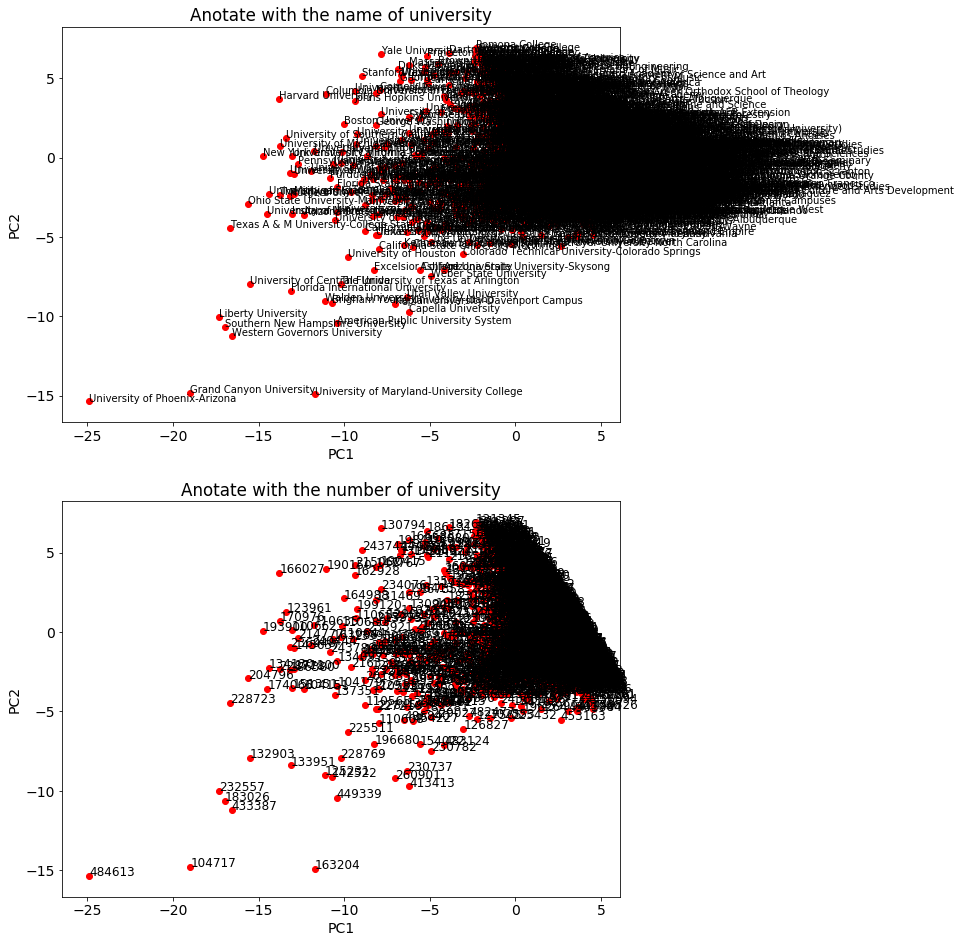

In [148]:
# the variance is over 90% when k=10
k = 10
mat_reduce =  mat @ vh.T[:, :k]  # the reduced matrix

## scatter plot
PC1, PC2 = mat_reduce[:,0], mat_reduce[:,1]

def plot_pc(PC1, PC2, data): 
    
    ## create two plots
    f, (ax1, ax2) = plt.subplots(2, 1, sharey=True, figsize=(10,16))
    
    # subplot 1 
    for i, t in enumerate(list(data['Institution Name'])):
        x, y = PC1[i], PC2[i]
        ax1.scatter(x, y,color='red')
        ax1.text(x, y, t, fontsize=10)
        ax1.set_xlabel('PC1')
        ax1.set_ylabel('PC2')
        ax1.set_title('Anotate with the name of university')
        
    # subplot 2
    for i, t in enumerate(list(data['UnitID'])):
        x, y = PC1[i], PC2[i]
        ax2.scatter(x, y,color='red')
        ax2.text(x, y, t, fontsize=12)
        ax2.set_xlabel('PC1')
        ax2.set_ylabel('PC2')
        ax2.set_title('Anotate with the number of university')
    
    plt.show()
    
    
plot_pc(PC1, PC2, data)

# Clustering

### As is shown, the prime number of clusters for full data, reduced data and the first two PCs is 2, the clustering resutl for different dataset is similar, but is significantly different from the clustering result of EM algorithm, though the prime number of clusters is also 2.

Complete clustering with 9 interation
Complete clustering with 21 interation
Complete clustering with 10 interation
Complete clustering with 28 interation
Complete clustering with 16 interation
Complete clustering with 15 interation
Complete clustering with 15 interation
        k=2        k=3        k=4        k=5        k=6        k=7        k=8
0  9.000000  21.000000  10.000000  28.000000  16.000000  15.000000  15.000000
1  0.035996   0.031827   0.012363   0.008926   0.015065   0.015065   0.015065


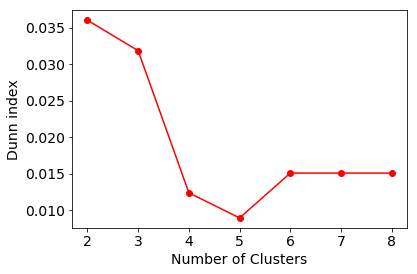

In [149]:
plot_dunn(mat)

Complete clustering with 8 interation
Complete clustering with 24 interation
Complete clustering with 11 interation
Complete clustering with 22 interation
Complete clustering with 34 interation
Complete clustering with 33 interation
Complete clustering with 33 interation
        k=2        k=3        k=4        k=5        k=6       k=7       k=8
0  8.000000  24.000000  11.000000  22.000000  34.000000  33.00000  33.00000
1  0.031603   0.009408   0.008759   0.004497   0.010318   0.01131   0.01131


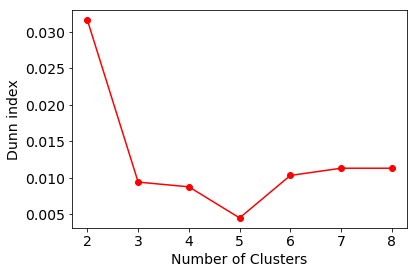

In [150]:
plot_dunn(mat_reduce)

Complete clustering with 11 interation
Complete clustering with 17 interation
Complete clustering with 25 interation
Complete clustering with 22 interation
Complete clustering with 26 interation
Complete clustering with 19 interation
Complete clustering with 19 interation
         k=2        k=3        k=4        k=5        k=6        k=7        k=8
0  11.000000  17.000000  25.000000  22.000000  26.000000  19.000000  19.000000
1   0.011873   0.000887   0.000777   0.000896   0.002035   0.001254   0.001254


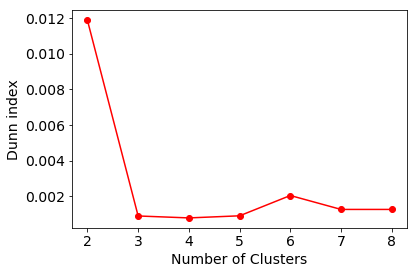

In [151]:
plot_dunn(mat_reduce[:, :2])

### K-Means Algorithm

In [163]:
def plot_cluster(nd, k):
    iteration, centroids, assign_points = kmeans(k,nd)
    
    ## scatter plot 
    cluster_id = [p[0] for p in assign_points]

    PC1, PC2 = mat_reduce[:,0], mat_reduce[:,1]

    fig, ax = plt.subplots(figsize=(12,10))
    ax.scatter(PC1, PC2, c = cluster_id)
    '''
    for i, t in enumerate(list(data['UnitID'])):
        ax.annotate(t, (PC1[i], PC2[i]), fontsize=10)  
    '''
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_title('Anotate with the name of university')
    plt.show()
    return cluster_id

Complete clustering with 9 interation


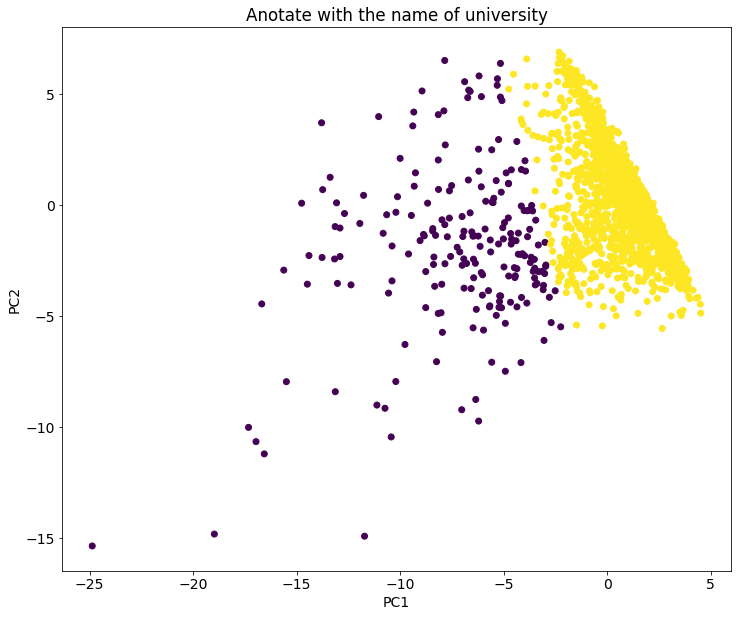

In [164]:
cluster_id = plot_cluster(mat, 2)

Complete clustering with 8 interation


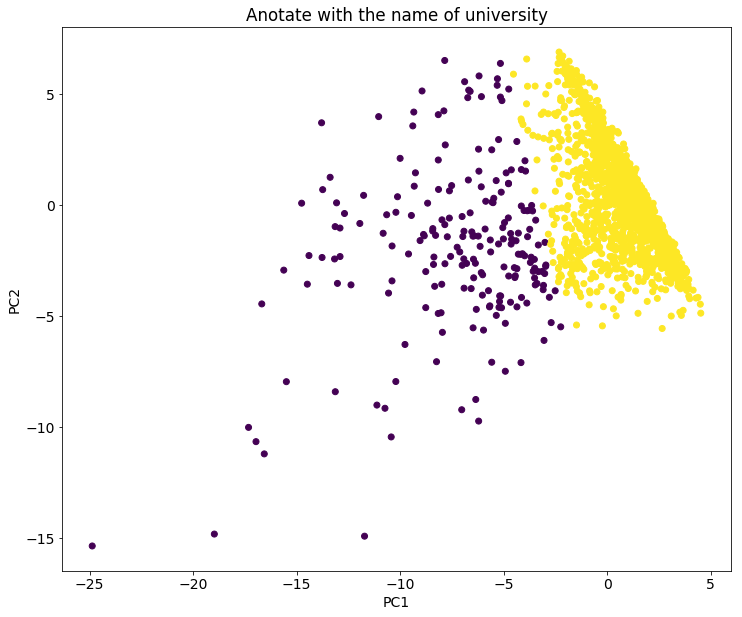

In [165]:
cluster_id = plot_cluster(mat_reduce, 2)

Complete clustering with 11 interation


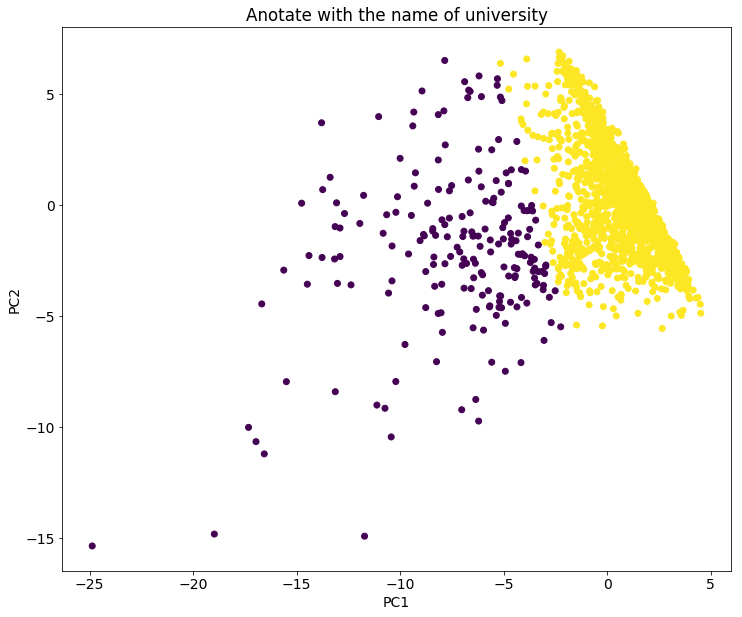

In [166]:
cluster_id = plot_cluster(mat_reduce[:,:2], 2)

### EM-Algorithm

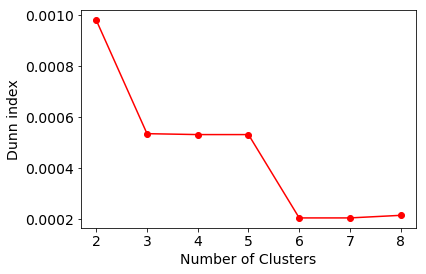

In [160]:
eps = 10**-4

dunn_list = []
iteration_list  = []
for j in range(2,9):
    assign_points = EM(mat_reduce[:,:2], j, eps)
    dunn_list.append(min_inter_dist(assign_points) / max_intra_dist(assign_points))
    iteration_list.append(iteration)
df = pd.DataFrame(np.array(list(zip(iteration_list, dunn_list))).T, columns = ['k='+str(i) for i in range(2,9)])

## plot 
plt.plot(range(2,9), dunn_list, 'ro-')
plt.xlabel('Number of Clusters')
plt.ylabel('Dunn index')
plt.show()

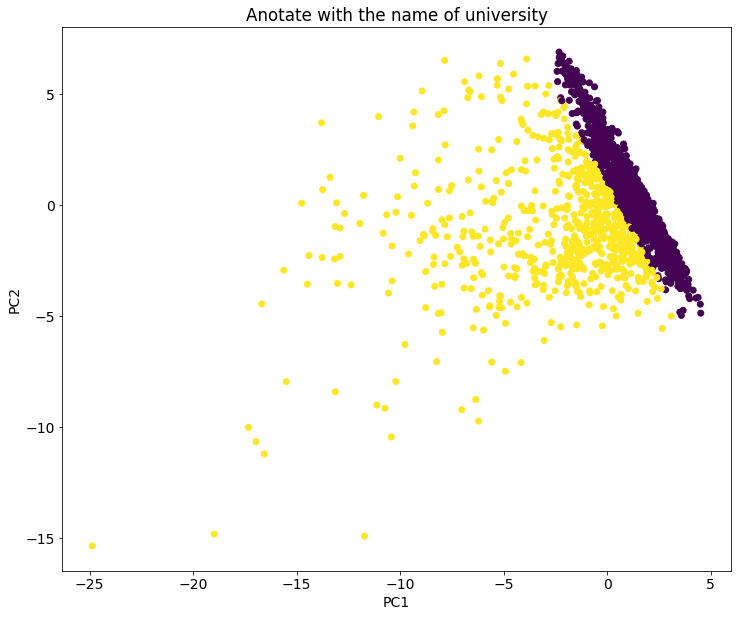

In [162]:
## scatter plot 
assign_points = EM(mat_reduce[:,:2], 2, eps)

cluster_id = [p[0] for p in assign_points]

PC1, PC2 = mat_reduce[:,0], mat_reduce[:,1]

fig, ax = plt.subplots(figsize=(12,10))
ax.scatter(PC1, PC2, c = cluster_id)

'''
for i, t in enumerate(list(data['UnitID'])):
    ax.annotate(t, (PC1[i], PC2[i]), fontsize=10)
'''

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Anotate with the name of university')
plt.show()